<a href="https://colab.research.google.com/github/yicongR/yolotest/blob/master/yolov4test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 14924, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 14924 (delta 21), reused 41 (delta 21), pack-reused 14880
Receiving objects: 100% (14924/14924), 13.37 MiB | 21.22 MiB/s, done.
Resolving deltas: 100% (10139/10139), done.


In [32]:
#%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [33]:
#验证CUDA版本
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [34]:
!make


chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...thi

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
#将谷歌云盘路径简写为mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Antrag Aufenthaltstitel.pdf'
 beleg.doc
'Colab Notebooks'
'Dynamische Netzwerke.rar'
'Efficient BackProp.gslides'
 IRS2018-paper_template.pdf
 JIUDONGXI
 thesis.zip
 Untitled
'Untitled Diagram (1).drawio'
'Untitled Diagram (2).drawio'
'Untitled Diagram (3).drawio'
'Untitled Diagram.drawio'
 yolov4
 汉诺威.rar
 课本.7z
'附件4  2015年新加坡硕博连读奖学金项目报名信息表.docx'


In [18]:
!ls /mydrive/yolov4

In [16]:
! gdown https://drive.google.com/open?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/open?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
To: /content/darknet/open?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
71.0kB [00:00, 9.63MB/s]


In [19]:
%cd /mydrive/yolov4

/content/gdrive/My Drive/yolov4


In [20]:
! gdown https://drive.google.com/open?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/open?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
To: /content/gdrive/My Drive/yolov4/open?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
63.7kB [00:00, 19.8MB/s]


In [8]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [10]:
!cp /mydrive/yolov4/yolov4.weights ./

In [36]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [38]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/dog.jpg  


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 

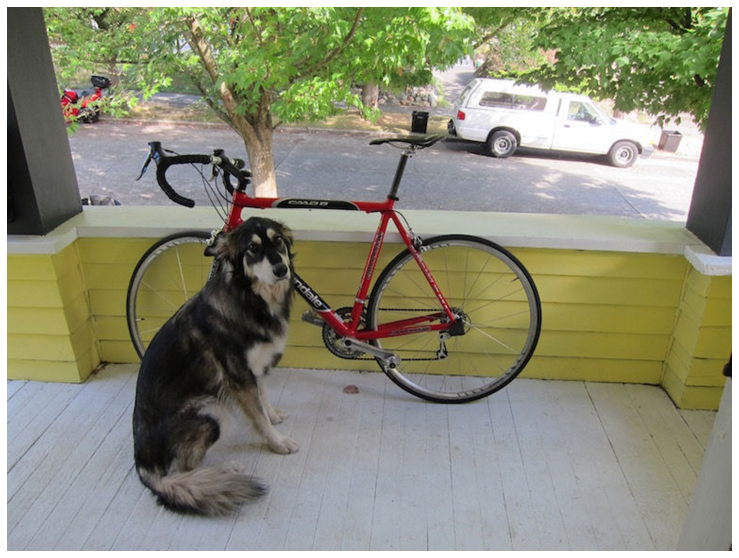

In [40]:
imShow('predictions.jpg')

# New section